In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import re
import sqlite3
import demoji
from flask import Flask, jsonify
app = Flask(__name__)
from flask import request
from flasgger import Swagger, LazyString, LazyJSONEncoder
from flasgger import swag_from


In [2]:
tweet_data = pd.read_csv('C://Users/tri.INTECS/OneDrive/Data Challange Gold/Copy of data.csv',encoding = 'latin-1')

forbidden_words = pd.read_csv('C://Users/tri.INTECS/OneDrive/Data Challange Gold/Copy of abusive.csv',encoding='latin-1')
alay_word = pd.read_csv("C://Users/tri.INTECS/OneDrive/Data Challange Gold/Copy of new_kamusalay.csv",encoding='latin-1')
alay_word.rename(columns = {'anakjakartaasikasik':'A','anak jakarta asyik asyik':'B'}, inplace=True)
new_row = {'A': 'anakjakartaasikasik', 
           'B': 'anak jakarta asyik asyik'}
alay_words = pd.concat([pd.DataFrame([new_row]), alay_word], ignore_index=True)

conn = sqlite3.connect('THM.db')

tweet_data.to_sql('tweet_data_table', conn, if_exists='replace', index=False)
forbidden_words.to_sql('forbidden_words_table', conn, if_exists='replace', index=False)
alay_words.to_sql('alay_words_table', conn, if_exists='replace', index=False)

print('Oke aman')
conn.close()

Oke aman


In [3]:
conn = sqlite3.connect('THM.db')

# Membaca data dari tabel tweet_data_table
query = 'SELECT * FROM tweet_data_table'
tweet_data_table = pd.read_sql_query(query, conn)
# Menampilkan 5 baris pertama dari DataFrame
print(tweet_data_table.head(3))

# Menutup koneksi
conn.close()

                                               Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  


In [6]:
import pandas as pd
import re
import demoji

conn = sqlite3.connect('THM.db')

a = 'SELECT * FROM tweet_data_table'
b = 'SELECT * FROM forbidden_words_table'
c = 'SELECT * FROM alay_words_table'

tweet_data_table = pd.read_sql_query(a, conn)
forbidden_words_table = pd.read_sql_query(b, conn)
alay_words_table = pd.read_sql_query(c, conn)


def lowercase(text):
    return text.lower()

def replace_alay_with_correct(sentence, alay_words):
    match = alay_words[alay_words['A'] == sentence]
    if not match.empty:
        return match.iloc[0]['B']
    return sentence


def remove_unnecessary_char(text):
    text = lowercase(text)
    text = demoji.replace(text, '') # Remove emoji
    text = re.sub("[()\d]", " ", text)  # Remove Decimal
    text = re.sub("[^A-Za-z0-9]+", " ", text)
    text = re.sub(r'[\\x]+[a-z0-9]{2}', ' ', text)   # Remove special character
    text = re.sub('\n', ' ', text)  # Remove every '\n'
    text = re.sub('rt', ' ', text)  # Remove every retweet symbol
    text = re.sub('user', ' ', text)  # Remove every username
    text = re.sub('gue', 'saya', text)
    text = re.sub('elu', 'kamu', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+)[0-9]+)', ' ', text)  # Remove every URL
    text = re.sub('  +', ' ', text)  # Remove extra spaces
    text = replace_alay_with_correct(text, alay_words_table) # Remove alay words
    
    return text




for word in forbidden_words_table['ABUSIVE']:
    tweet_data_table['Tweet'] = tweet_data_table['Tweet'].str.replace(word, '')

# dl = tweet_data['Tweet'].tolist()
# dlf = []
# for i in tweet_data:
#   dlf.append(remove_unnecessary_char(i.lower()))

dlf = [remove_unnecessary_char(tweet) for tweet in tweet_data_table['Tweet']]


df = pd.DataFrame({'After':dlf})


print('oke Aman')

conn.close()
df.head(6)

oke Aman


,After
0,disaat semua cowok berusaha melacak perhatian...
1,siapa yang telat ngasih tau kamu saya bergaul...
2,kadang aku berfikir kenapa aku tetap percaya ...
3,aku itu aku n nku tau matamu sipit tapi dilia...
4,kaum ce kapir udah keliatan nya dari awal tam...
5,ya dkk xf x f x x xf x f x x xf x f x x


In [ ]:
app = Flask(__name__)

from flask import request
from flasgger import Swagger, LazyString, LazyJSONEncoder
from flasgger import swag_from

conn = sqlite3.connect('THM.db')

b = 'SELECT * FROM forbidden_words_table'
c = 'SELECT * FROM alay_words_table'
alay_words_table = pd.read_sql_query(c, conn)
forbidden_words_table = pd.read_sql_query(b, conn)


def lowercase(text):
    return text.lower()

def replace_alay_with_correct(sentence, alay_words):
    match = alay_words[alay_words['A'] == sentence]
    if not match.empty:
        return match.iloc[0]['B']
    return sentence


def remove_unnecessary_char(text):
    text = lowercase(text)
    text = demoji.replace(text, '') # Remove emoji
    text = re.sub("[()\d]", " ", text)  # Remove Decimal
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # Remove special character
    text = re.sub('\n', ' ', text)  # Remove every '\n'
    text = re.sub('rt', ' ', text)  # Remove every retweet symbol
    text = re.sub('user', ' ', text)  # Remove every username
    text = re.sub('gue', 'saya', text)
    text = re.sub('elu', 'kamu', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+)[0-9]+)', ' ', text)  # Remove every URL
    text = re.sub('  +', ' ', text)  # Remove extra spaces
    text = replace_alay_with_correct(text, alay_words_table) # Remove alay words
    return text

app.json_encoder = LazyJSONEncoder
swagger_template = {
    "info": {
        "title":  "API Documentation for Data Processing and Modeling",
        "version": "1.0.0",
        "description": "Dokumentasi API untuk Data Processing dan Modeling"
    },
    "host": "127.0.0.1:5000"
}

swagger_config = {
 "headers" : [],
 "specs" : [
  {
   "endpoint" : 'docs',
   "route" : '/docs.json'
  }
 ],
 "static_url_path" : '/flasgger_statis',
 "swagger_ui" : True,
 "specs_route" : "/docs/"
}

swagger = Swagger(app, template=swagger_template, config=swagger_config)

@swag_from("C:/Users/tri.INTECS/OneDrive/Testing/Detail/docs/hello_world.yml", methods=['GET'])
@app.route('/', methods=['GET'])
def hello_world():
    json_response = {
        'status_code': 200,
        'description': "Menyapa Hello World",
        'data': "Hello World",
    }

    response_data = jsonify(json_response)
    return response_data

@swag_from("C://Users/tri.INTECS/OneDrive/Testing/Detail/docs/text.yml", methods=['GET'])
@app.route('/text', methods=['GET'])
def text():
    json_response = {
        'status_code': 200,
        'description': "Original Teks",
        'data': "Halo, apa kabar semua?",
    }

    response_data = jsonify(json_response)
    return response_data

@swag_from("C://Users/tri.INTECS/OneDrive/Testing/Detail/docs/text_clean.yml", methods=['GET'])
@app.route('/text-clean', methods=['GET'])
def text_clean():
    json_response = {
        'status_code': 200,
        'description': "Teks yang sudah dibersihkan",
        'data': re.sub(r'[^a-zA-Z0-9]', ' ', "Halo, apa kabar semua?"),
    }
    input_text = "Halo, apa kabar semua?"  # Ganti teks dengan input yang sesuai
    cleaned_text = remove_unnecessary_char(input_text)

    json_response = {
        'status_code': 200,
        'description': "Teks yang sudah dibersihkan",
        'data': cleaned_text,
    }
    response_data = jsonify(json_response)
    return response_data

@swag_from("C://Users/tri.INTECS/OneDrive/Testing/Detail/docs/text_processing.yml", methods=['POST'])
@app.route('/text-processing', methods=['POST'])
def text_processing():

    try:
        text = request.form.get('text')

        cleaned_text = remove_unnecessary_char(text)

        for word in forbidden_words_table['ABUSIVE']:
            cleaned_text = cleaned_text.replace(word, '')
            
        json_response = {
            'status_code': 200,
            'description': "Teks yang sudah diproses",
            'data': cleaned_text,
        }

        response_data = jsonify(json_response)
        return response_data

    except Exception as e:
        error_response = {
            'status_code': 500,
            'error_message': str(e),
        }
        response_data = jsonify(error_response)
        return response_data


@swag_from("C://Users/tri.INTECS/OneDrive/Testing/Detail/docs/text_processing_file.yml", methods=['POST'])
@app.route('/text-processing-file', methods=['POST'])
def text_processing_file():

    try:
        file = request.files.getlist('file')[0]

        df = pd.read_csv(file, encoding='latin-1')

        texts = df['Tweet']

        for word in forbidden_words_table['ABUSIVE']:
            texts = texts.str.replace(word, '')

        cleaned_texts = [remove_unnecessary_char(tweet) for tweet in texts]

        rd = pd.DataFrame({'Cleaned_Text': cleaned_texts})

        conn = sqlite3.connect('THM.db')
        rd.to_sql('cleaned_data', conn, if_exists='replace', index=False)
        conn.close()


        json_response = {
            'status_code': 200,
            'description': "Teks yang sudah diproses",
            'data': cleaned_texts,
        }


        response_data = jsonify(json_response)
        return response_data

    except Exception as e:

        error_response = {
            'status_code': 500,
            'error_message': str(e),
        }
        response_data = jsonify(error_response)
        return response_data
    
if __name__ == '__main__':
   app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Dec/2023 23:13:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2023 23:13:41] "GET /docs/ HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2023 23:13:41] "GET /flasgger_statis/swagger-ui.css HTTP/1.1" 304 -
127.0.0.1 - - [02/Dec/2023 23:13:41] "GET /flasgger_statis/swagger-ui-bundle.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Dec/2023 23:13:41] "GET /flasgger_statis/lib/jquery.min.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Dec/2023 23:13:41] "GET /flasgger_statis/swagger-ui-standalone-preset.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Dec/2023 23:13:42] "GET /docs.json HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2023 23:14:00] "POST /text-processing HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2023 23:14:50] "POST /text-processing-file HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2023 23:17:56] "POST /text-processing HTTP/1.1" 200 -


In [8]:
# combine_file=tweet_data.iloc[:,0]

tabel_gabungan = pd.merge(df, tweet_data, left_index=True, right_index=True, how='inner')
tabel_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   After          13169 non-null  object
 1   Tweet          13169 non-null  object
 2   HS             13169 non-null  int64 
 3   Abusive        13169 non-null  int64 
 4   HS_Individual  13169 non-null  int64 
 5   HS_Group       13169 non-null  int64 
 6   HS_Religion    13169 non-null  int64 
 7   HS_Race        13169 non-null  int64 
 8   HS_Physical    13169 non-null  int64 
 9   HS_Gender      13169 non-null  int64 
 10  HS_Other       13169 non-null  int64 
 11  HS_Weak        13169 non-null  int64 
 12  HS_Moderate    13169 non-null  int64 
 13  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 1.4+ MB


In [9]:
tabel_gabungan['Remarks'] = (tabel_gabungan['HS'] + tabel_gabungan['Abusive']).apply(lambda x: 'Mengandung Kata HS/Abusive' if x > 0 else 'Tidak Mengandung kata HS/Abusive')


tabel_gabungan.head(5)

,After,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Remarks
0,disaat semua cowok berusaha melacak perhatian...,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Mengandung Kata HS/Abusive
1,siapa yang telat ngasih tau kamu saya bergaul...,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Mengandung Kata HS/Abusive
2,kadang aku berfikir kenapa aku tetap percaya ...,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,Tidak Mengandung kata HS/Abusive
3,aku itu aku n nku tau matamu sipit tapi dilia...,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,Tidak Mengandung kata HS/Abusive
4,kaum ce kapir udah keliatan nya dari awal tam...,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Mengandung Kata HS/Abusive


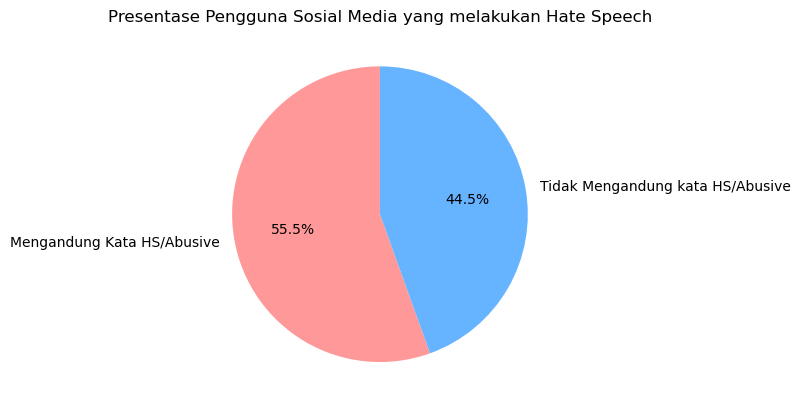

In [33]:
Remarks_count = tabel_gabungan['Remarks'].value_counts()
Remarks_count.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Presentase Pengguna Sosial Media yang melakukan Hate Speech')
plt.ylabel('')
plt.show()

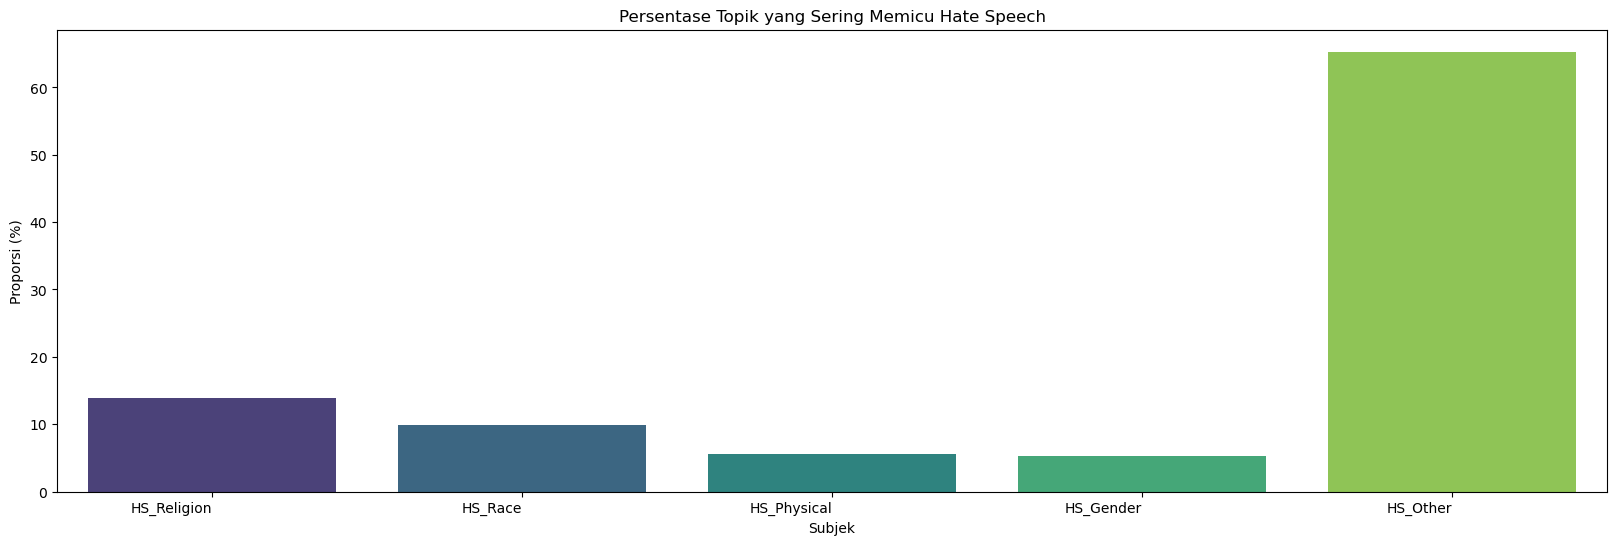

In [67]:
subjek_columns = ['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']

jumlah_tweet_per_subjek = tabel_gabungan[subjek_columns].sum()

total_tweet = jumlah_tweet_per_subjek.sum()

proporsi_relatif = jumlah_tweet_per_subjek / total_tweet * 100

plt.figure(figsize=(20, 6))
sns.barplot(x=proporsi_relatif.index, y=proporsi_relatif.values, palette='viridis')
plt.title('Persentase Topik yang Sering Memicu Hate Speech')
plt.xlabel('Subjek')
plt.ylabel('Proporsi (%)')
plt.xticks(rotation=0, ha='right')
plt.show()


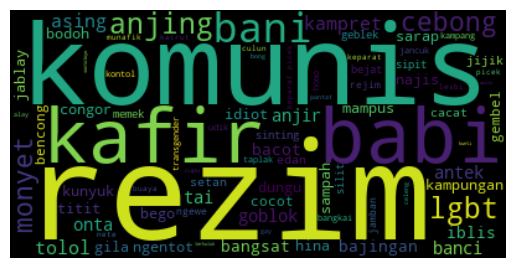

In [78]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

conn = sqlite3.connect('THM.db')

b = 'SELECT * FROM forbidden_words_table'
forbidden_words_table = pd.read_sql_query(b, conn)

# Menggabungkan semua teks dari kolom 'Tweet' yang mengandung kata HS/Abusive
text = ''.join(tabel_gabungan['Tweet'])

# Memfilter kata-kata yang ada di dalam kamus abusive
filtered_text = ' '.join(word.lower() for word in text.split() if word.lower() in forbidden_words_table['ABUSIVE'].values)

# Membuat WordCloud
wordcloud = WordCloud().generate(filtered_text)

# Menampilkan WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
conn.close()